In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('customer_support_tickets.csv')
# View data
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,22-03-2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Not Provided,Critical,Social media,01-06-2023 12:15,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,22-05-2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Not Provided,Critical,Chat,01-06-2023 16:45,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,14-07-2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,01-06-2023 11:14,01-06-2023 18:05,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,13-11-2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,01-06-2023 07:29,01-06-2023 01:57,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,04-02-2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,01-06-2023 00:12,01-06-2023 19:53,1.0


In [17]:
df.shape     # Rows & columns

(8469, 17)

In [19]:
df.columns     # Column names

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [21]:
df.info()  # Data types & nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    8469 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [23]:
df.describe()   #Summary Stats

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [25]:
#### Missing Value Analysis

df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                         0
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [27]:
### Unique Values Per Column

df.nunique()

Ticket ID                       8469
Customer Name                   8028
Customer Email                  8320
Customer Age                      53
Customer Gender                    3
Product Purchased                 42
Date of Purchase                 730
Ticket Type                        5
Ticket Subject                    16
Ticket Description              8077
Ticket Status                      3
Resolution                      2770
Ticket Priority                    4
Ticket Channel                     4
First Response Time             1502
Time to Resolution              1283
Customer Satisfaction Rating       5
dtype: int64

In [29]:
### Categorical Feature Distributions

print(df['Ticket Status'].value_counts())
print(df['Ticket Priority'].value_counts())
print(df['Ticket Channel'].value_counts())

Ticket Status
Pending Customer Response    2881
Open                         2819
Closed                       2769
Name: count, dtype: int64
Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64
Ticket Channel
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64


In [33]:
### Date Conversion

df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], dayfirst=True)
df['First Response Time'] = pd.to_datetime(df['First Response Time'], dayfirst=True, errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

In [42]:
### Calculate Resolution Time (in hours)

df['Resolution Time (Hours)'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600

df[['Resolution Time (Hours)', 'Customer Satisfaction Rating']].describe()

,Resolution Time (Hours),Customer Satisfaction Rating
count,2670.000000,2769.000000
mean,-3497.979313,2.991333
std,65.188133,1.407016
min,-3526.866667,1.000000
25%,-3510.412500,2.000000
50%,-3503.458333,3.000000
75%,-3497.016667,4.000000
max,-2762.500000,5.000000


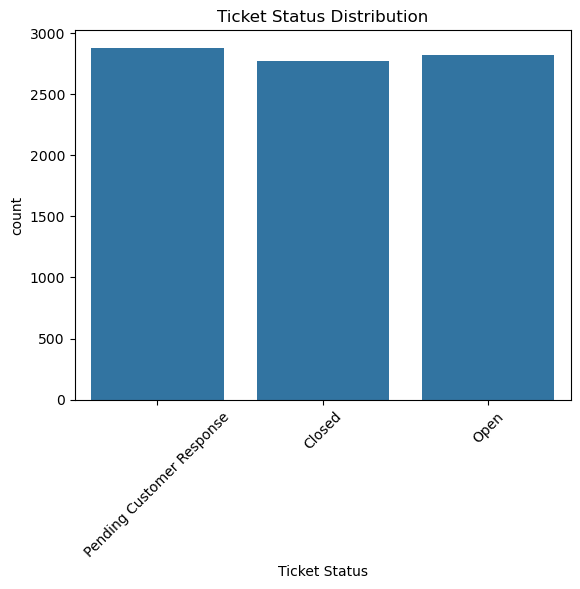

In [44]:
sns.countplot(data=df, x='Ticket Status')
plt.title('Ticket Status Distribution')
plt.xticks(rotation=45)
plt.show()

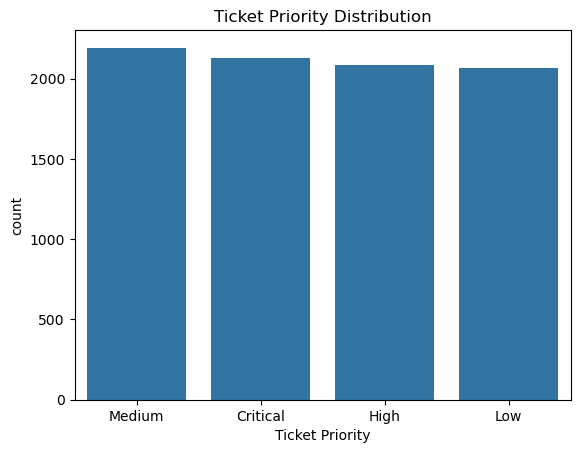

In [46]:
sns.countplot(data=df, x='Ticket Priority', order=df['Ticket Priority'].value_counts().index)
plt.title('Ticket Priority Distribution')
plt.show()

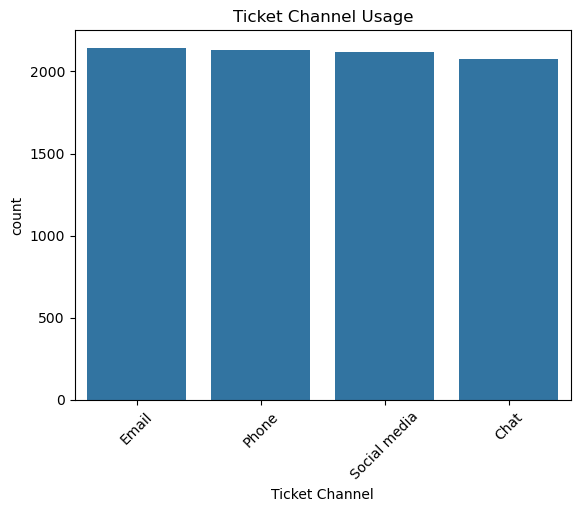

In [48]:
sns.countplot(data=df, x='Ticket Channel', order=df['Ticket Channel'].value_counts().index)
plt.title('Ticket Channel Usage')
plt.xticks(rotation=45)
plt.show()

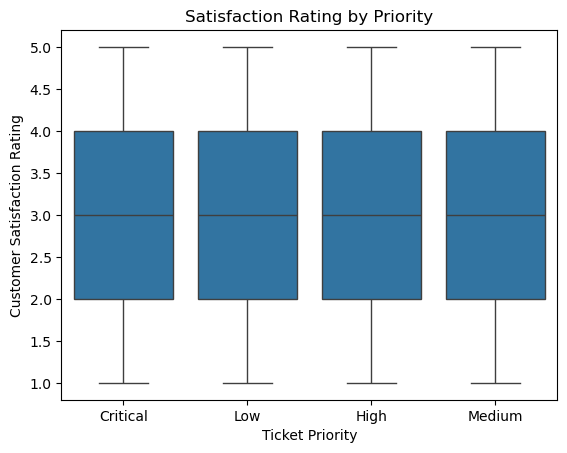

In [50]:
sns.boxplot(data=df, x='Ticket Priority', y='Customer Satisfaction Rating')
plt.title('Satisfaction Rating by Priority')
plt.show()

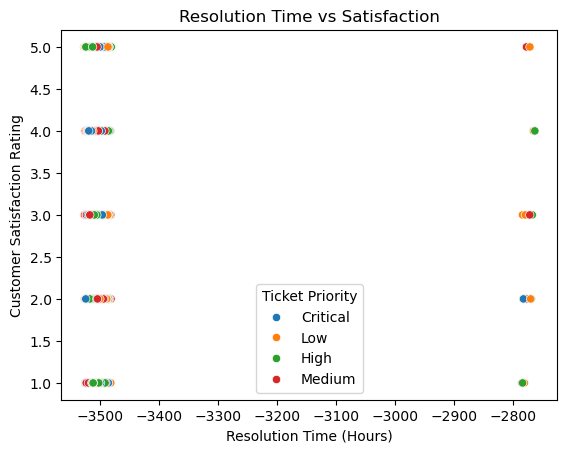

In [52]:
sns.scatterplot(data=df, x='Resolution Time (Hours)', y='Customer Satisfaction Rating', hue='Ticket Priority')
plt.title('Resolution Time vs Satisfaction')
plt.show()

In [54]:
df.groupby('Ticket Type')['Customer Satisfaction Rating'].mean().sort_values(ascending=False)

Ticket Type
Cancellation request    3.029070
Billing inquiry         3.027574
Product inquiry         3.016886
Technical issue         2.958621
Refund request          2.934564
Name: Customer Satisfaction Rating, dtype: float64

In [56]:
df.groupby(['Ticket Type', 'Ticket Status']).size().unstack(fill_value=0)

Ticket Status,Closed,Open,Pending Customer Response
Ticket Type,,,
Billing inquiry,544,539,551
Cancellation request,516,582,597
Product inquiry,533,532,576
Refund request,596,564,592
Technical issue,580,602,565
